In [67]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm

In [2]:
yulu=pd.read_csv("bike_sharing.txt")


In [205]:
df=yulu.copy()
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [206]:
df.shape#The Dataset has 10,886 rows with 12 columns

(10886, 12)

In [207]:
df.info()#There are no missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [208]:
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

## **Observation-No missing/null values**

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


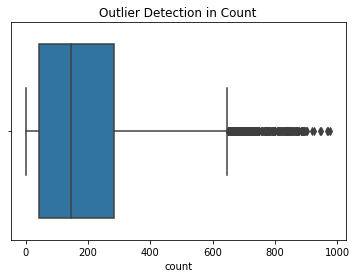

In [8]:
sns.boxplot(df["count"])
plt.title("Outlier Detection in Count")
plt.show()

<AxesSubplot:xlabel='count', ylabel='Density'>

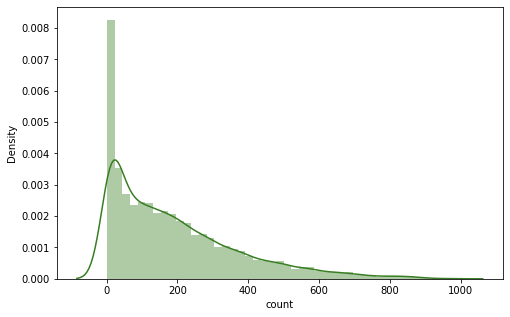

In [244]:
sns.distplot(yulu["count"])

In [9]:
q1=df["count"].quantile(.25)
q1

42.0

In [10]:
q3=df["count"].quantile(.75)
q3

284.0

In [11]:
iqr=1.5*stats.iqr(df["count"])
iqr

363.0

In [209]:
df.loc[(df["count"]<q1-iqr)|(df["count"]>iqr+q3)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662


## **Observation- 2.8% data is outlier hence removing them for EDA**

In [210]:
#Outlier Removal
df=df.loc[(df["count"]>=q1-iqr) & (df["count"]<=q3+iqr)]
df.shape

(10586, 12)

In [211]:
#Statistical info after Outlier removal in column count
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000,10586.000000
mean,2.498489,0.029189,0.676459,1.422539,20.061494,23.476271,62.165124,12.776699,33.973172,141.743907,175.717079
std,1.121629,0.168345,0.467849,0.636549,7.781496,8.467852,19.231315,8.173430,46.972642,126.945473,156.360023
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,34.000000,40.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,23.862500,62.000000,12.998000,16.000000,114.000000,138.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,46.000000,211.000000,270.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,355.000000,625.000000,647.000000


In [218]:
#Categorical value conversions
#season
df["season"].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
df["holiday"].replace({0:"No",1:"Yes"},inplace=True)
df["workingday"].replace({0:"No",1:"Yes"},inplace=True)

In [16]:
#Categorising weather into zones 
"""Green-1: Clear, Few clouds, partly cloudy, partly cloudy
Yellow-2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
Orange-3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Red-4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"""
df.insert(12,"Zone",'')

In [17]:
df.loc[df["weather"]==1,"Zone"]="Green"
df.loc[df["weather"]==2,"Zone"]="Yellow"
df.loc[df["weather"]==3,"Zone"]="Orange"
df.loc[df["weather"]==4,"Zone"]="Red"

In [18]:
#unique value
for col in ("season","holiday","workingday","Zone"):
    print(df[col].value_counts())
    print("-"*50)

Spring    2670
Winter    2665
Summer    2634
Fall      2617
Name: season, dtype: int64
--------------------------------------------------
No     10277
Yes      309
Name: holiday, dtype: int64
--------------------------------------------------
Yes    7161
No     3425
Name: workingday, dtype: int64
--------------------------------------------------
Green     6965
Yellow    2770
Orange     850
Red          1
Name: Zone, dtype: int64
--------------------------------------------------


In [19]:
#unique value
print("Percent Values")
print("*"*50)
for col in ("season","holiday","workingday","Zone"):
    print(df[col].value_counts(normalize=True)*100)
    print("-"*50)

Percent Values
**************************************************
Spring    25.221991
Winter    25.174759
Summer    24.881920
Fall      24.721330
Name: season, dtype: float64
--------------------------------------------------
No     97.08105
Yes     2.91895
Name: holiday, dtype: float64
--------------------------------------------------
Yes    67.645947
No     32.354053
Name: workingday, dtype: float64
--------------------------------------------------
Green     65.794445
Yellow    26.166635
Orange     8.029473
Red        0.009446
Name: Zone, dtype: float64
--------------------------------------------------


In [20]:
#Percent of rentals by casual and registered users
df.loc[:,"casual":"registered"].sum(axis=0)*100/df.loc[:,"count"].sum()

casual        19.334018
registered    80.665982
dtype: float64

## **Observation- 81% of rentals are done by registered users and 19% by casual users.**

In [21]:
#Datetime split two columns
#df.insert(1,"Date",'')
#df.insert(2,"Time","")
ts=pd.to_datetime(df["datetime"])
df["Date"]=ts.dt.date
df["Time"]=ts.dt.time

In [22]:
ts.dt.day.value_counts()#For what all days data is given

1     563
7     563
8     562
4     560
5     560
6     560
12    559
9     559
2     558
14    558
16    556
10    556
13    555
3     555
19    555
15    554
17    552
18    552
11    549
Name: datetime, dtype: int64

In [23]:
ts.dt.year.unique()#for which years

array([2011, 2012], dtype=int64)

In [24]:
ts.dt.month.unique()#for which months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## **Observation-The data is given for the year 2011 and 2012 .Its for the first 19 days for each month .**

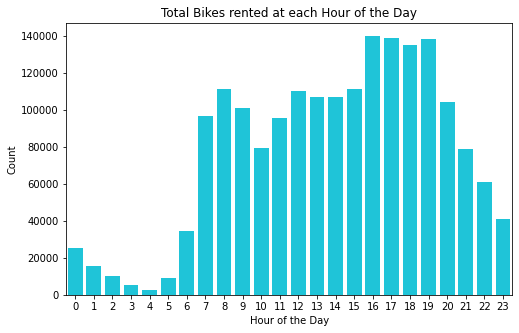

In [25]:
y=df.groupby("Time")["count"].sum().to_list()
x=list(ts.dt.hour.unique())
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(x=x,y=y,color="#00DCF7")
plt.title("Total Bikes rented at each Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

## **Observation-Significant number of bikes are rented between 4pm and 7pm.This is also observed in morning around 8pm.But an interesting fact is that morning hours people are not using Yulu bikes much as compared to evening.Lets check whether this is the trend followed by Casual and Registered Users**

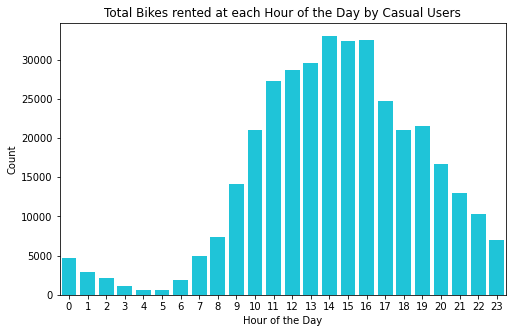

In [26]:
y=df.groupby("Time")["casual"].sum().to_list()
x=list(ts.dt.hour.unique())
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(x=x,y=y,color="#00DCF7")
plt.title("Total Bikes rented at each Hour of the Day by Casual Users")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

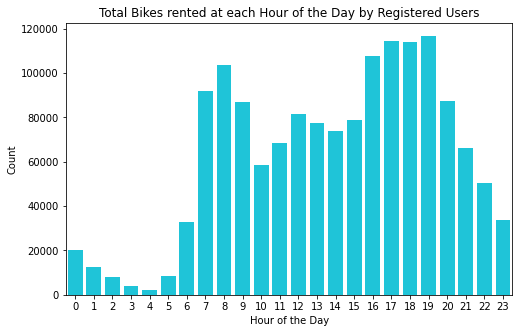

In [27]:
y=df.groupby("Time")["registered"].sum().to_list()
x=list(ts.dt.hour.unique())
plt.rcParams["figure.figsize"] = (8,5)
sns.barplot(x=x,y=y,color="#00DCF7")
plt.title("Total Bikes rented at each Hour of the Day by Registered Users")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

## **Observation-As per the plots the casual users tends to rent the bikes more between 11am and 5pm.Whereas for Registered users its in the morning between 7am and 9pm and also evening between 4pm and 8pm.Thus it can be concluded that a dip in usage of rented bikes in the morning when the total count is plottted is due to casual users**

In [38]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Zone,Date,Time
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0000,3,13,16,Green,2011-01-01,00:00:00
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,8,32,40,Green,2011-01-01,01:00:00
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0000,5,27,32,Green,2011-01-01,02:00:00
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,3,10,13,Green,2011-01-01,03:00:00
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0000,0,1,1,Green,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,No,Yes,1,15.58,19.695,50,26.0027,7,329,336,Green,2012-12-19,19:00:00
10882,2012-12-19 20:00:00,Winter,No,Yes,1,14.76,17.425,57,15.0013,10,231,241,Green,2012-12-19,20:00:00
10883,2012-12-19 21:00:00,Winter,No,Yes,1,13.94,15.910,61,15.0013,4,164,168,Green,2012-12-19,21:00:00
10884,2012-12-19 22:00:00,Winter,No,Yes,1,13.94,17.425,61,6.0032,12,117,129,Green,2012-12-19,22:00:00


## **To check the Distribution of bikes rented by Registered and casual users .**

In [39]:
y_cas=np.array(df["casual"])
y_reg=np.array(df["registered"])

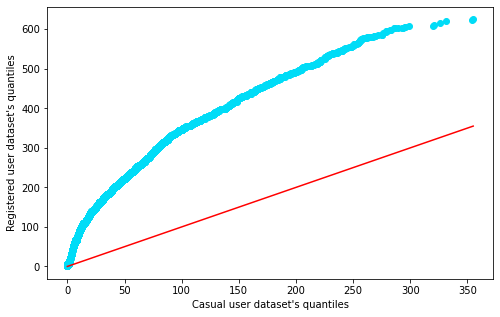

In [40]:
y_cas.sort()
y_reg.sort()
plt.scatter(y_cas,y_reg,color='#00DCF7')
plt.plot([min(y_cas),max(y_cas)],[min(y_cas),max(y_cas)],color="red") 
plt.xlabel("Casual user dataset's quantiles") 
plt.ylabel("Registered user dataset's quantiles") 
plt.show()

## **Observation-The Casual and Registered users the count of rented bikes follows different distribution.Hence need to do the Hypothesis test for these groups separately**

In [155]:
#Split the registered users into two based on workingday
reg_workday_yes=np.array(df.loc[df["workingday"]=="Yes"]["registered"])
reg_workday_no=np.array(df.loc[df["workingday"]=="No"]["registered"])

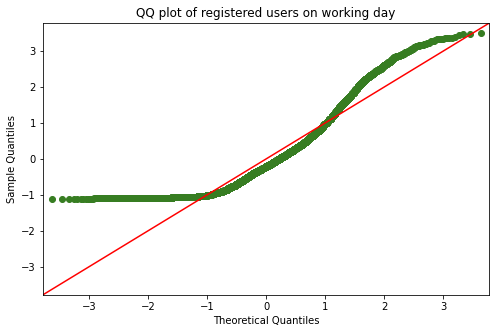

In [42]:
fig=sm.qqplot(reg_workday_yes,line='45',fit=True,color='#00DCF7')
plt.title("QQ plot of registered users on working day")
plt.show()

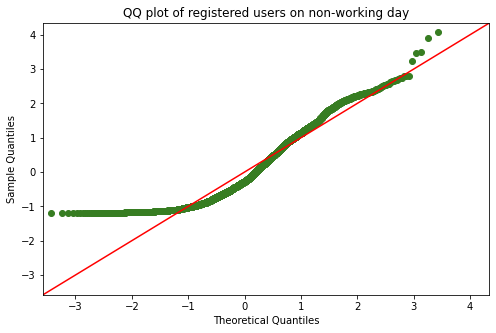

In [43]:
fig=sm.qqplot(reg_workday_no,line='45',fit=True)
plt.title("QQ plot of registered users on non-working day")
plt.show()

## **Both working and non working days the sample of registered users  follows a non gaussian distribution**

In [44]:
print("Number of sample for registered userd on working day", len(reg_workday_yes))
print("Number of sample for registered userd on NON working day", len(reg_workday_no))

Number of sample for registered userd on working day 7161
Number of sample for registered userd on NON working day 3425


## *Do a 2 sample T test to check working day has an effect on the bikes  rented by registered users.*

## **Null Hypothesis Ho-Population mean of bikes rented by registered users are same on working and non working day**
## **Alternate Hypothesis Ha--Population mean of bikes rented by registered users are not  same on working and non working day**
## **Do a 2 sided 2 sample T-test for the same.**
## **Significance level alpha=5%**

In [45]:
stats.ttest_ind(reg_workday_yes,reg_workday_no)

Ttest_indResult(statistic=9.304211747570628, pvalue=1.6162942317656157e-20)

## **Observation:Here Tobs=9.3 and p_val<<alpha.Hence reject Null Hypothesis.Thus it can be concluded that for Registered users working day do matter on Number of bikes rented**

## *2sample T test to check whether the bikes rented on working day is more than non working day for registered users* ##
## **Null Hypothesis Ho-Population mean of bikes rented by registered users are same on working and non working day**
## **Alternate Hypothesis Ha--Population mean of bikes rented by registered users on working day is more than non working day**
## **Do a Right tail 2 sample T-test for the same.**
## **Significance level alpha=5%**

In [178]:
import math
m1=np.mean(reg_workday_yes)
m2=np.mean(reg_workday_no)
s1=np.std(reg_workday_yes)
s2=np.std(reg_workday_no)
n1=len(reg_workday_yes)
n2=len(reg_workday_no)
dof=n1+n2-2
den=math.sqrt(((s1**2)/n1)+((s2**2)/n2))
tobs=(m1-m2)/den

p_val=1-(stats.t.cdf(tobs,dof))
print("Test statistic=",tobs,"p-val is ",p_val)


Test statistic= 10.20944277605562 p-val is  0.0


## **p_val<<alpha.Hence reject Null Hypothesis.Thus it can be concluded that for Registered users bike rented on working day is more than non working day**

## **Similarly do T test on casual users**

In [46]:
cas_workday_yes=np.array(df.loc[df["workingday"]=="Yes"]["casual"])
cas_workday_no=np.array(df.loc[df["workingday"]=="No"]["casual"])

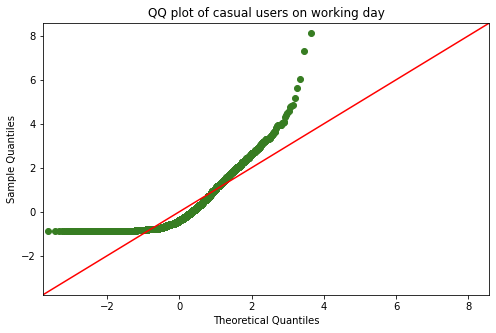

In [47]:
fig=sm.qqplot(cas_workday_yes,line='45',fit=True)
plt.title("QQ plot of casual users on working day")
plt.show()

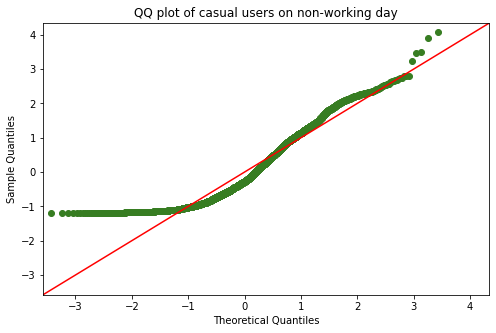

In [48]:
fig=sm.qqplot(reg_workday_no,line='45',fit=True)
plt.title("QQ plot of casual users on non-working day")
plt.show()

## **Observation-Casual users distribution also follows non gaussian irrespective of whether its a working day or not**

## **Null Hypothesis Ho-Population mean of bikes rented by casual users are same on working and non working day**
## **Alternate Hypothesis Ha--Population mean of bikes rented by casual users are not  same on working and non working day**
## **Do a 2 sided 2 sample T-test for the same.**
## **Significance level alpha=5%**

In [49]:
stats.ttest_ind(cas_workday_yes,cas_workday_no)

Ttest_indResult(statistic=-35.56275822294936, pvalue=9.010520146791741e-262)

## **Observation:Here Tobs=35.562 and p_val<<alpha.Hence reject Null Hypothesis.Thus it can be concluded that for casual users working day do matter on Number of bikes rented**

## *2sample T test to check whether the bikes rented on working day is more than non working day for casual users* ##
## **Null Hypothesis Ho-Population mean of bikes rented by casual users are same on working and non working day**
## **Alternate Hypothesis Ha--Population mean of bikes rented by casual users on working day is more than non working day**
## **Do a Right tail 2 sample T-test for the same.**
## **Significance level alpha=5%**

In [165]:
stats.ttest_ind(cas_workday_yes,cas_workday_no,alternative="greater")

Ttest_indResult(statistic=-35.56275822294936, pvalue=1.0)

In [238]:
dof=len(cas_workday_yes)+len(cas_workday_no)-2

pval=(stats.t.cdf(-35.56,df))+(1-stats.t.cdf(35.56,df=dof))
pval

4.918148675814627e-262

In [241]:
(1-stats.t.cdf(35.56,df))+stats.t.cdf(-35.56,df=dof)

4.918148675814627e-262

In [175]:
m1=np.mean(cas_workday_yes)
m2=np.mean(cas_workday_no)
s1=np.std(cas_workday_yes)
s2=np.std(cas_workday_no)
n1=len(cas_workday_yes)
n2=len(cas_workday_no)
df=n1+n2-1
den=math.sqrt(((s1**2)/n1)+((s2**2)/n2))
tobs=(m1-m2)/den
tobs

-27.293407121016923

In [243]:
(1-stats.t.cdf(35.56,df))

0.0

## *To check the dependency of Weather on No:of cycles Rented*

In [55]:
cnt_green=df.loc[df["Zone"]=="Green"]["count"]
cnt_yellow=df.loc[df["Zone"]=="Yellow"]["count"]
cnt_orange=df.loc[df["Zone"]=="Orange"]["count"]
cnt_red=df.loc[df["Zone"]=="Red"]["count"]


## **Checking Assumptions for Annova**

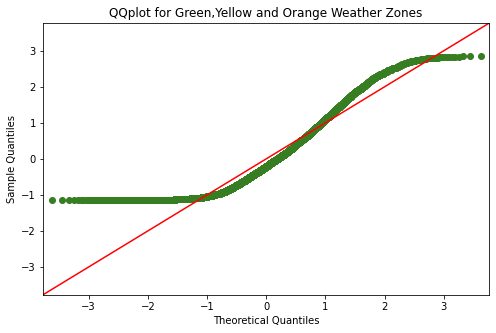

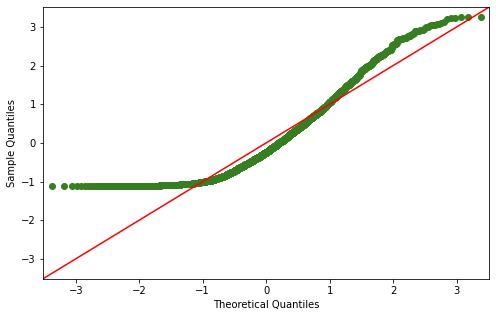

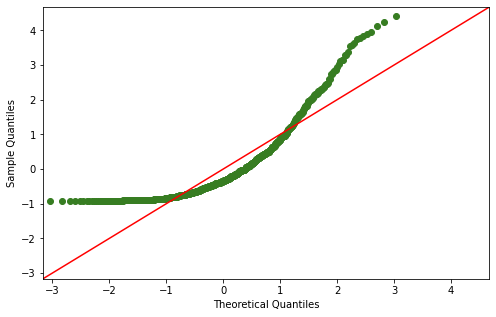

In [63]:

fig=sm.qqplot(cnt_green,line='45',fit=True)
plt.title("QQplot for Green,Yellow and Orange Weather Zones")
fig=sm.qqplot(cnt_yellow,line='45',fit=True)
fig=sm.qqplot(cnt_orange,line='45',fit=True)

plt.show()



## **For the three weather zones ,its a non gaussian distribution,Hence need to do a Box cox transformation on the same.For the Red zone since it only have one observation,its not fair to draw conclusions based on it**

In [81]:
print("The Standard deviation for Green weather zone is",round(np.std(cnt_green),2))
print("The Standard deviation for Yellow weather zone is",round(np.std(cnt_yellow),2))
print("The Standard deviation for Orange weather zone is",round(np.std(cnt_orange),2))

The Standard deviation for Green weather zone is 161.57
The Standard deviation for Yellow weather zone is 146.97
The Standard deviation for Orange weather zone is 121.16


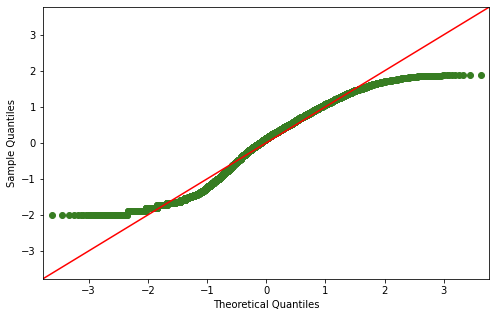

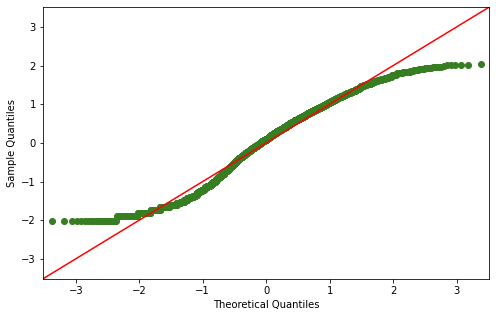

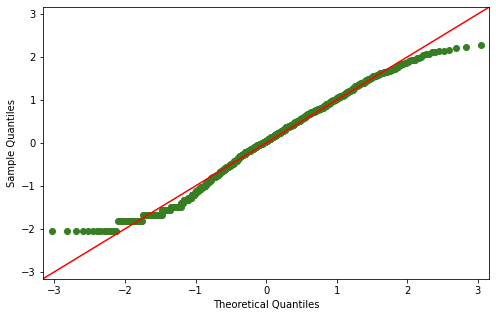

In [71]:
for x in (cnt_green,cnt_yellow,cnt_orange):
    x_list=np.array(x.to_list())
    x_trans,l=scipy.stats.boxcox(x_list)
    sm.qqplot(x_trans,line='45',fit=True)

## **Eventhough the variance for each of the three weather zones are roughly same ,the distribution is clearly not gaussian even after a Box cox Transformation.Hence Opting for Kruskal Wallis Test to check the dependency of weather on bikes rented**

## **Null Hypothesis Ho-The population median of  groups (Green,Yellow,Orange) are equal**
## **Alternate Hypothesis Ha-The population median of  groups (Green,Yellow,Orange) are different**
## **Kruskal Wallis test is  done with significance level as 5%**
 
    

In [83]:
scipy.stats.kruskal(cnt_green,cnt_yellow,cnt_orange)

KruskalResult(statistic=187.50718004505146, pvalue=1.9201413252466828e-41)

## **Observed Test Statistic is 187.5 with p_value very less compared to alpha.Hence concluding the weather do impact the bikes rented.Let's see how?**

## *To Analyse data wrt to weather and holiday/workingday*

In [28]:
#Create a new dataframe which conatins the total bikes rented by registered users wrt Weather/holiday/workingday
df_registered=df.groupby(["Zone","holiday","workingday"])["registered"].sum().to_frame().reset_index()
df_registered

,Zone,holiday,workingday,registered
0,Green,No,No,279795
1,Green,No,Yes,734960
2,Green,Yes,No,26804
3,Orange,No,No,17927
4,Orange,No,Yes,61291
5,Orange,Yes,No,1503
6,Red,No,Yes,158
7,Yellow,No,No,89680
8,Yellow,No,Yes,275243
9,Yellow,Yes,No,13140


In [29]:
#Create a new dataframe which conatins the total bikes rented by casual users wrt Weather/holiday/workingday
df_casual=df.groupby(["Zone","holiday","workingday"])["casual"].sum().to_frame().reset_index()
df_casual


,Zone,holiday,workingday,casual
0,Green,No,No,133176
1,Green,No,Yes,120788
2,Green,Yes,No,9225
3,Orange,No,No,7265
4,Orange,No,Yes,6770
5,Orange,Yes,No,327
6,Red,No,Yes,6
7,Yellow,No,No,36942
8,Yellow,No,Yes,39720
9,Yellow,Yes,No,5421


In [30]:
#Merging above two datasets
df1=df_registered.merge(df_casual,on=["Zone","holiday","workingday"])
df1

,Zone,holiday,workingday,registered,casual
0,Green,No,No,279795,133176
1,Green,No,Yes,734960,120788
2,Green,Yes,No,26804,9225
3,Orange,No,No,17927,7265
4,Orange,No,Yes,61291,6770
5,Orange,Yes,No,1503,327
6,Red,No,Yes,158,6
7,Yellow,No,No,89680,36942
8,Yellow,No,Yes,275243,39720
9,Yellow,Yes,No,13140,5421


In [31]:
#Compute the conditional Probability for weather holiday/workingday criteria
df1["p_registered"]=df1["registered"]*100/(df1.loc[:,"registered"].sum())
df1["p_casual"]=df1["casual"]*100/((df1.loc[:,"casual"].sum()))
df1["holiday/workingday"]=df1["holiday"]+"/"+df1["workingday"]
df1


,Zone,holiday,workingday,registered,casual,p_registered,p_casual,holiday/workingday
0,Green,No,No,279795,133176,18.646772,37.030364,No/No
1,Green,No,Yes,734960,120788,48.980974,33.585808,No/Yes
2,Green,Yes,No,26804,9225,1.786337,2.565065,Yes/No
3,Orange,No,No,17927,7265,1.194734,2.020076,No/No
4,Orange,No,Yes,61291,6770,4.084702,1.882438,No/Yes
5,Orange,Yes,No,1503,327,0.100167,0.090924,Yes/No
6,Red,No,Yes,158,6,0.010530,0.001668,No/Yes
7,Yellow,No,No,89680,36942,5.976670,10.271939,No/No
8,Yellow,No,Yes,275243,39720,18.343407,11.044378,No/Yes
9,Yellow,Yes,No,13140,5421,0.875708,1.507341,Yes/No


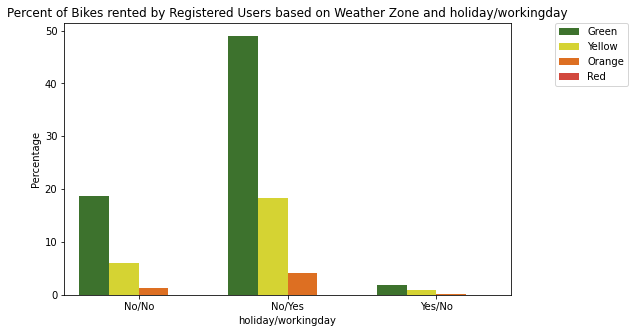

In [32]:
colors=["#377D22","#F0ED18","#FC6A03","#EB3324"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x="holiday/workingday",y="p_registered",data=df1,hue_order=["Green","Yellow","Orange","Red"],hue="Zone")
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.title("Percent of Bikes rented by Registered Users based on Weather Zone and holiday/workingday")
plt.ylabel("Percentage")
plt.show()

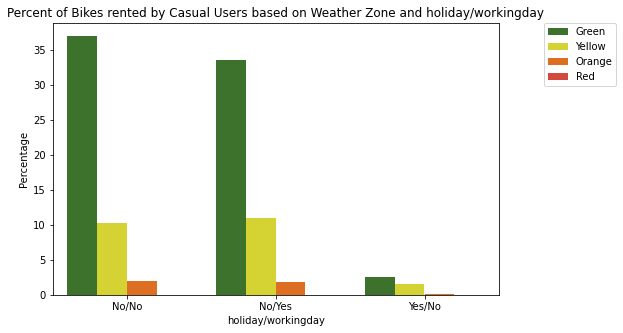

In [33]:
sns.barplot(x="holiday/workingday",y="p_casual",data=df1,hue="Zone",hue_order=["Green","Yellow","Orange","Red"])
plt.legend(bbox_to_anchor=(1.1 ,1), loc='upper left', borderaxespad=0)
plt.title("Percent of Bikes rented by Casual Users based on Weather Zone and holiday/workingday")
plt.ylabel("Percentage")
plt.show()

## **Inference-For both registered and casual users more bikes are rented when the whether is in Green zone ie Mostly clear followed by yellow ,orange and least in Red zones which is quite obvious.Working days has most bikes rented for registered users and for casual users this trend happen during weekend.Interesting to observe that for both registered and casual users the bikes rented are very less on holidays.**

## **Through Hypothesis testing it was found that weather do impact the number of bikes rented.Let's check which weather zone has a higher population mean through Bootstrapping and 95% Confidence Intervals**

In [179]:
"""introducing two custom functions to split the dataframe and to Bootstrap
1)Function to split the dataframe df based 
on the column name and column value"""
def DataFrameSplit (df,column,value):
    name_dataframe="df_"+column+"_"+value
    x=df.loc[df[column]==value]
    x.reset_index(inplace=True)
    x.drop("index",axis=1,inplace=True)
    return name_dataframe,x

In [184]:
#Dataframe df is split based on column Zone and value=Green.The resultant dataframe is stored in dictionary dataframes
name,data=DataFrameSplit(df1,"Zone","Green")
dataframes={}
dataframes[name] = data

In [185]:
#initialsing dictionaries to store the confidence intervals and bootstrap means for the dataframes post the split
dataframes_namelist_pos=0
ci_dict={}
bootstrap_mean_dict={}

In [194]:
"""2)This function is used to find the bootstrapped means of the dataframes post the spilt and then find their confidence 
intervals
The bootstrapped means of each of the split dataframes are stored in dictionary bootstrap_mean_dict and the 95% CI's is computed """
def BootStrapFunc(data):
    bootstap_mean_list=[]
    global dataframes_namelist_pos
    number_of_times=200
    for i in range (number_of_times):
        sample_data=data.sample(n=len(data),replace=True)
        bootstrap_mean=np.mean(sample_data["count"])
        bootstap_mean_list.append(bootstrap_mean)
    c_interval=[]
    global ci_dict
    global bootstrap_mean_dict
    bootstrap_mean=np.mean(bootstap_mean_list)
    
    ci_name=list(dataframes.keys())[dataframes_namelist_pos]
    ci_name=ci_name+'_CI'
    
    bs_name=list(dataframes.keys())[dataframes_namelist_pos]
    bs_name=bs_name+"_BS"

    ci=95
    lb=(100-ci)/2
    ub=ci+(100-ci)/2
    c_interval.append(np.percentile(bootstap_mean_list,[lb,ub]))
    print("Mean of the Sampling Distribution is",round(bootstrap_mean,2))
    print("95% Confidence Interval is [",round(c_interval[0][0],2),",",round(c_interval[0][1],2),"]")
    ci_dict[ci_name]=c_interval
    bootstrap_mean_dict[bs_name]=bootstap_mean_list
    
    dataframes_namelist_pos+=1

In [195]:
#BootStrapFunc function call on splitted dataframe to find CI
BootStrapFunc(dataframes['df_Zone_Green'])

Mean of the Sampling Distribution is 187.26
95% Confidence Interval is [ 183.13 , 190.62 ]


In [197]:
#Repeat the same function calls for weather Zone=Yellow
name,data=DataFrameSplit(df1,"Zone","Yellow")
dataframes[name]=data


In [198]:
#BootStrapFunc function call on splitted dataframe to find CI
BootStrapFunc(dataframes['df_Zone_Yellow'])

Mean of the Sampling Distribution is 166.2
95% Confidence Interval is [ 159.85 , 171.11 ]


In [199]:
#Repeat the same function calls for weather Zone=Orange
name,data=DataFrameSplit(df1,"Zone","Orange")
dataframes[name]=data

In [200]:
#BootStrapFunc function call on splitted dataframe to find CI
BootStrapFunc(dataframes['df_Zone_Orange'])

Mean of the Sampling Distribution is 111.5
95% Confidence Interval is [ 104.52 , 120.83 ]


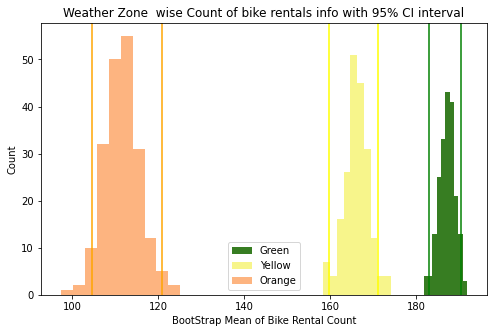

In [202]:
#Plot for 95% CI
plt.hist(bootstrap_mean_dict["df_Zone_Green_BS"],label="Green")
plt.hist(bootstrap_mean_dict["df_Zone_Yellow_BS"],label="Yellow",alpha=.5)
plt.hist(bootstrap_mean_dict["df_Zone_Orange_BS"],label="Orange",alpha=.5)
plt.axvline(ci_dict['df_Zone_Green_CI'][0][0],c='g')
plt.axvline(ci_dict['df_Zone_Green_CI'][0][1],c='g')
plt.axvline(ci_dict['df_Zone_Yellow_CI'][0][0],color='yellow')
plt.axvline(ci_dict['df_Zone_Yellow_CI'][0][1],color='yellow')
plt.axvline(ci_dict['df_Zone_Orange_CI'][0][0],color='orange')
plt.axvline(ci_dict['df_Zone_Orange_CI'][0][1],color='orange')
plt.title("Weather Zone  wise Count of bike rentals info with 95% CI interval")
plt.xlabel("BootStrap Mean of Bike Rental Count")
plt.ylabel("Count")
plt.legend()
plt.show()

## **Inference-The confidence intervals are distinct and non overlapping which implies the number of bikes rented significantly depends on the weather.Here when the weather is in Green zone the average number of bikes rented is between 183 and 190.In Yellow its between 160 and 170 and in Orange its between 104 and 120**

## *To check the dependency of Season on No:of cycles Rented*


In [87]:
cnt_spring=df.loc[df["season"]=="Spring"]["count"]
cnt_winter=df.loc[df["season"]=="Winter"]["count"]
cnt_summer=df.loc[df["season"]=="Summer"]["count"]
cnt_fall=df.loc[df["season"]=="Fall"]["count"]

## **Checking Assumptions for Annova**

In [88]:
print("The Standard deviation for Spring is",round(np.std(cnt_spring),2))
print("The Standard deviation for Winter is",round(np.std(cnt_winter),2))
print("The Standard deviation for Summer is",round(np.std(cnt_summer),2))
print("The Standard deviation for Fall is",round(np.std(cnt_fall),2))


The Standard deviation for Spring is 116.86
The Standard deviation for Winter is 154.76
The Standard deviation for Summer is 166.34
The Standard deviation for Fall is 164.21


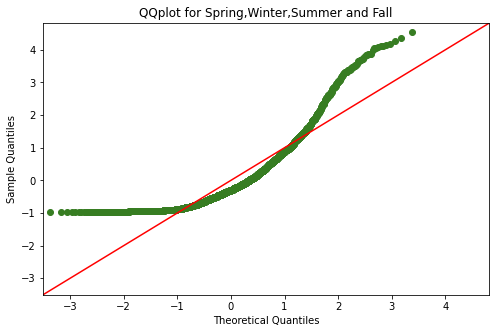

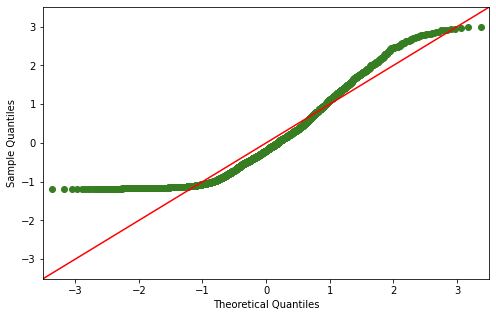

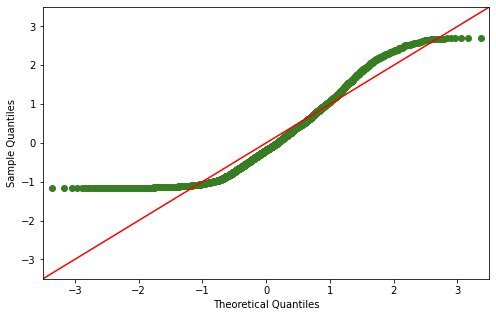

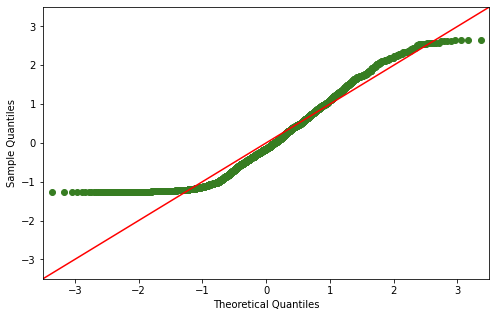

In [90]:
fig=sm.qqplot(cnt_spring,line='45',fit=True)
plt.title("QQplot for Spring,Winter,Summer and Fall")
fig=sm.qqplot(cnt_winter,line='45',fit=True)
fig=sm.qqplot(cnt_summer,line='45',fit=True)
fig=sm.qqplot(cnt_fall,line='45',fit=True)

plt.show()

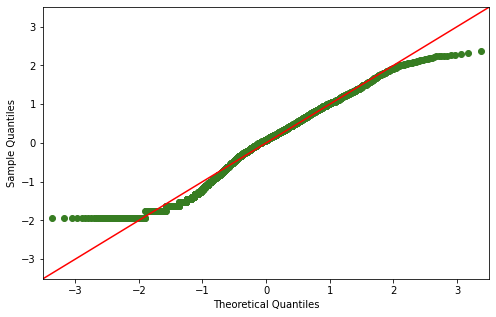

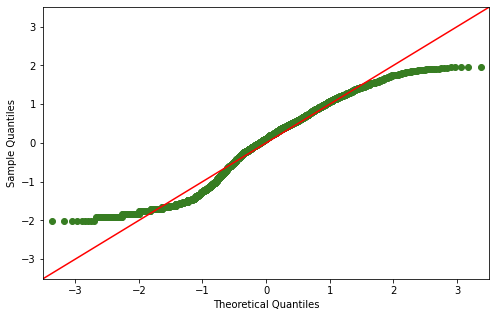

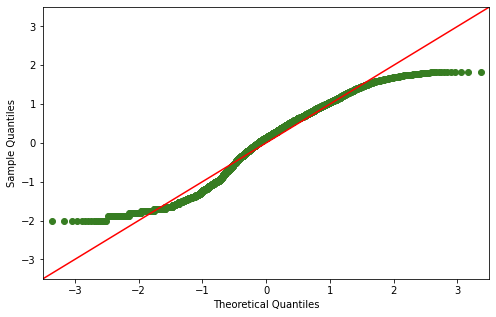

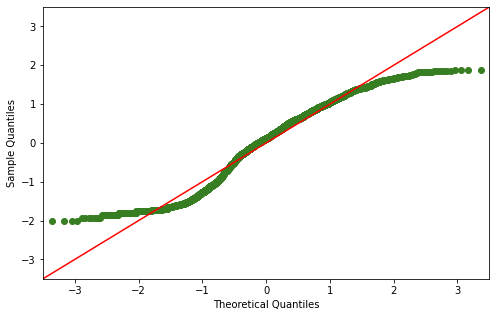

In [92]:
#BOX COX Transformation
#plt.title("After Transformation")
for x in (cnt_spring,cnt_winter,cnt_summer,cnt_fall):
    x_list=np.array(x.to_list())
    x_trans,l=scipy.stats.boxcox(x_list)
    
    sm.qqplot(x_trans,line='45',fit=True)

## **Eventhough the variance for each of the four seasons are roughly same ,the distribution is clearly not gaussian even after a Box cox Transformation.Hence Opting for Kruskal Wallis Test to check the dependency of season on bikes rented**

## **Null Hypothesis Ho-The population median of  all seasons are equal**
## **Alternate Hypothesis Ha-The population median of  the seasons  are different**
## **Kruskal Wallis test is  done with significance level as 5%**

In [93]:
scipy.stats.kruskal(cnt_spring,cnt_winter,cnt_summer,cnt_fall)

KruskalResult(statistic=620.3738431848594, pvalue=3.8591953474560567e-134)

## **Observed Test Statistic is 620.37 with p_value very less compared to alpha.Hence concluding the seasons do impact the bikes rented.Let's see how?**

In [245]:
season_reg=df.groupby(["season"])["registered"].sum().to_frame().reset_index()
season_cas=df.groupby(["season"])["casual"].sum().to_frame().reset_index()
#Merging above two datasets


AttributeError: 'int' object has no attribute 'groupby'

In [36]:
#Compute the conditional Probability for season criteria
df2["p_registered"]=df2["registered"]*100/(df2.loc[:,"registered"].sum())
df2["p_casual"]=df2["casual"]*100/((df2.loc[:,"casual"].sum()))
df2.drop(columns=["registered","casual"],inplace=True)
df2.set_index("season",inplace=True)
df2

,p_registered,p_casual
season,,
Fall,28.057362,36.223168
Spring,17.489025,10.771883
Summer,26.505814,32.833667
Winter,27.947799,20.171282


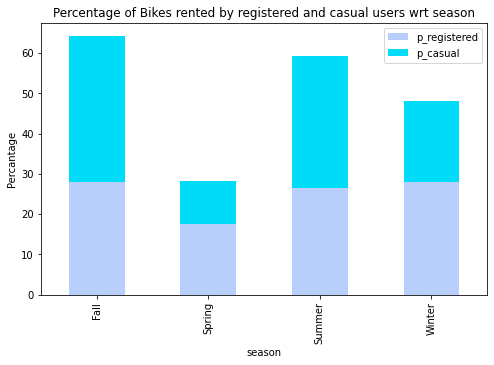

In [37]:
df2.plot(kind='bar', stacked=True, color=['#B8CFFC', '#00DCF7'])
plt.ylabel("Percantage")
plt.title("Percentage of Bikes rented by registered and casual users wrt season")
plt.show()

## **Inference-For Registered users the percentage of rented bikes is almost same for all seasons expect Spring.For Casual users its high during Fall and Summer and less during Spring and Winter**

## **Through Hypothesis testing it was found that season do impact the number of bikes rented.Let's check which season has a higher population mean through Bootstrapping and 95% Confidence Intervals**

In [221]:
#re-initialsing dictionaries to store the split dataframes,confidenceintervals,bootstrap mean
dataframes_namelist_pos=0
ci_dict={}
bootstrap_mean_dict={}
dataframes={}

In [222]:
name,data=DataFrameSplit(df,"season","Spring")
dataframes[name]=data

In [223]:
#BootStrapFunc function call on split dataframe to find CI
BootStrapFunc(dataframes['df_season_Spring'])

Mean of the Sampling Distribution is 112.8
95% Confidence Interval is [ 108.7 , 117.03 ]


In [224]:
name,data=DataFrameSplit(df,"season","Winter")
dataframes[name]=data
BootStrapFunc(dataframes['df_season_Winter'])

Mean of the Sampling Distribution is 184.73
95% Confidence Interval is [ 179.29 , 190.64 ]


In [225]:
name,data=DataFrameSplit(df,"season","Summer")
dataframes[name]=data
BootStrapFunc(dataframes['df_season_Summer'])

Mean of the Sampling Distribution is 195.36
95% Confidence Interval is [ 189.85 , 201.1 ]


In [226]:
name,data=DataFrameSplit(df,"season","Fall")
dataframes[name]=data
BootStrapFunc(dataframes['df_season_Fall'])

Mean of the Sampling Distribution is 210.34
95% Confidence Interval is [ 203.76 , 216.44 ]


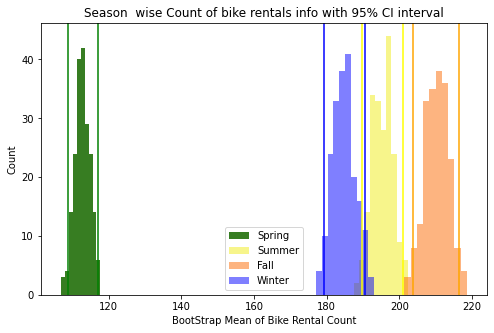

In [231]:
#Plot for 95% CI
plt.hist(bootstrap_mean_dict["df_season_Spring_BS"],label="Spring")
plt.hist(bootstrap_mean_dict["df_season_Summer_BS"],label="Summer",alpha=.5)
plt.hist(bootstrap_mean_dict["df_season_Fall_BS"],label="Fall",alpha=.5)
plt.hist(bootstrap_mean_dict["df_season_Winter_BS"],label="Winter",alpha=.5,color='blue')
plt.axvline(ci_dict['df_season_Spring_CI'][0][0],c='g')
plt.axvline(ci_dict['df_season_Spring_CI'][0][1],c='g')
plt.axvline(ci_dict['df_season_Summer_CI'][0][0],color='yellow')
plt.axvline(ci_dict['df_season_Summer_CI'][0][1],color='yellow')
plt.axvline(ci_dict['df_season_Fall_CI'][0][0],color='orange')
plt.axvline(ci_dict['df_season_Fall_CI'][0][1],color='orange')
plt.axvline(ci_dict['df_season_Winter_CI'][0][0],color='blue')
plt.axvline(ci_dict['df_season_Winter_CI'][0][1],color='blue')
plt.title("Season  wise Count of bike rentals info with 95% CI interval")
plt.xlabel("BootStrap Mean of Bike Rental Count")
plt.ylabel("Count")
plt.legend()
plt.show()

## **Inference-There is an overlap of CI's during Winter and Summer.However the Spring and Fall seasons are quite distinct from each other.The highest of bike rentals happen during Fall and the least during Spring.**


## *To check Weather dependent on season or not*

## **Chi-square test is done.**
## **Since there is only one observation for Red Weather zone ,removing this row**
## **Null Hypothesis Ho-Weather is independent on seasons**
## **Alternate Hypothesis-Weather is dependent on seasons**
## **Significance level alpha=5%**

In [99]:
#number of rows available for each season-weather combination
df.groupby(["season","Zone"])["count"].count()

season  Zone  
Fall    Green     1843
        Orange     195
        Yellow     579
Spring  Green     1744
        Orange     211
        Red          1
        Yellow     714
Summer  Green     1721
        Orange     223
        Yellow     690
Winter  Green     1657
        Orange     221
        Yellow     787
Name: count, dtype: int64

In [112]:
df1=df.loc[df["Zone"]!="Red"]

In [153]:
obs=pd.crosstab(index=df1["season"],columns=df1["Zone"],values=df1["count"],aggfunc="sum")
obs

Zone,Green,Orange,Yellow
season,,,
Fall,402602,27883,120789
Spring,212386,12919,75694
Summer,367404,26973,121426
Winter,322356,27308,142237


In [154]:
stats.chi2_contingency(obs)

(8409.547609716874,
 0.0,
 6,
 array([[386711.04478819,  28181.4160831 , 136381.53912871],
        [211146.61270112,  15387.22678668,  74465.1605122 ],
        [361828.6315605 ,  26368.11995471, 127606.24848479],
        [345061.71095019,  25146.23717551, 121693.0518743 ]]))

## **Test statistic is 8409.54 with p value=0 less than significance level hence rejecting Ho,ie Weather is dependent on seasons**

# **Inference**

## **Through different Hypothesis tests found that weather ,season,working/non working day has significant influence on the bikes rented by the Users**